# Exploratory Data Analysis on Layoffs 2022: 

In this exploratory data analysis project we will insights from Layoffs 2022 dataset. We will gain incredible insights from their distribution and classifications.

#### Importing Libraries for Data Analysis and Visualisation :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
import warnings
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/layoffs-2022/layoffs.csv


## Data Preparation :

In [2]:
df = pd.read_csv('/kaggle/input/layoffs-2022/layoffs.csv')

In [3]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,SIRCLO,Jakarta,Retail,160.0,0.08,2022-11-22,Series B,Indonesia,92.0
1,Trax,Singapore,Retail,80.0,0.08,2022-11-22,Series E,Singapore,1000.0
2,Kitopi,Dubai,Food,93.0,0.10,2022-11-21,Series C,United States,804.0
3,Zomato,Gurugram,Food,100.0,0.04,2022-11-19,Series J,India,914.0
4,Carvana,Phoenix,Transportation,1500.0,0.08,2022-11-18,IPO,United States,1600.0


In [4]:
df.shape

(1659, 9)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_laid_off,1179.0,198.034775,576.963286,3.0,31.0,70.00,150.00,11000.0
percentage_laid_off,1110.0,0.275070,0.265643,0.0,0.1,0.19,0.32,1.0
funds_raised,1544.0,888.407575,6514.276406,0.0,43.6,130.00,377.25,121900.0


In [6]:
df.dtypes

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
date                    object
stage                   object
country                 object
funds_raised           float64
dtype: object

In [7]:
#checking for Missing Values :

df.isna().sum()

company                  0
location                 0
industry                 3
total_laid_off         480
percentage_laid_off    549
date                     0
stage                    4
country                  0
funds_raised           115
dtype: int64

We can see a lot of Missing Values in total_laid_off column , Since no of Layoff per company is the important data and unique per company, we can't substitue it , let us fill those values with zeroes

In [8]:
df['total_laid_off'] = df['total_laid_off'].fillna(0)
df['percentage_laid_off'] = df['percentage_laid_off'].fillna(0)
df['stage'] = df['stage'].fillna(0)
df['funds_raised'] = df['funds_raised'].fillna(0)
df['industry'] = df['industry'].fillna(0)

## 1 - Companies with Top Layoffs :

In [9]:
top_companies = df.nlargest(5,['total_laid_off'])

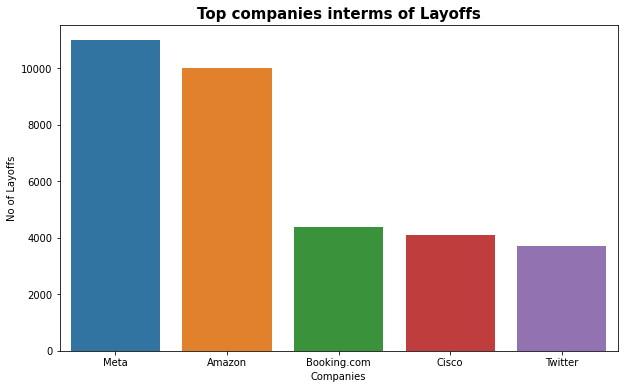

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_companies.company, y=top_companies.total_laid_off)
plt.title("Top companies interms of Layoffs", fontsize=15, fontweight='bold')
plt.xlabel("Companies")
plt.ylabel("No of Layoffs")
plt.show()

#### Conclusion :

* Meta, Amazon, Booking.com, Cisco & Twitter are the companies with most layoffs,
* With Meta topping the chart with over 11000 layoffs.

## 2 - Layoffs by Companies across Sectors : 

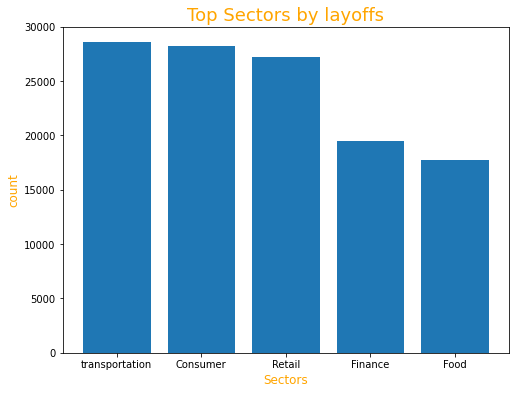

In [11]:
sectors = np.array(df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head())
arr = np.array(['transportation','Consumer','Retail','Finance','Food'])

arr = np.array(['transportation','Consumer','Retail','Finance','Food'])
plt.figure(figsize= (8 ,6))
plt.bar(arr,sectors)
plt.xlabel('Sectors',fontdict={'size':12,'color':'orange'})
plt.ylabel('count',fontdict={'size':12,'color':'orange'})
plt.title('Top Sectors by layoffs',fontdict={'size':18,'color':'orange'})
plt.show()


#### Transportaion sector have laid off People more than anyone else

## 3 - Countries that are Mostly affected by layoffs :

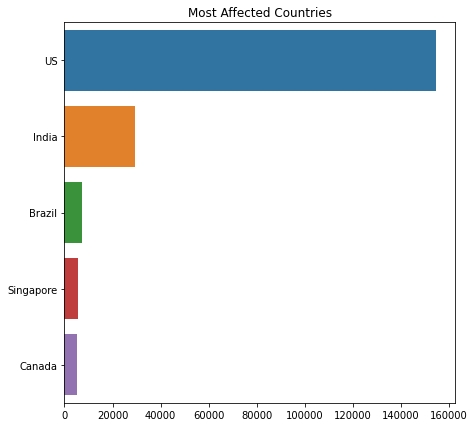

In [12]:
countries = np.array(df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head())
arr1 = np.array(['US','India','Brazil','Singapore','Canada'])

plt.figure(figsize=(7,7))
ax = sns.barplot(x=countries, y=arr1, data=df)
plt.title('Most Affected Countries')
plt.show()

#### Conclusion :

The United States has seen the most layoffs, followed by India.

## 4 - City with Most no of Layoffs :

In [13]:
location = df.groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head()
arr2 = np.array(['SF bay Area','NYC','Bengaluru','seattle','boston'])

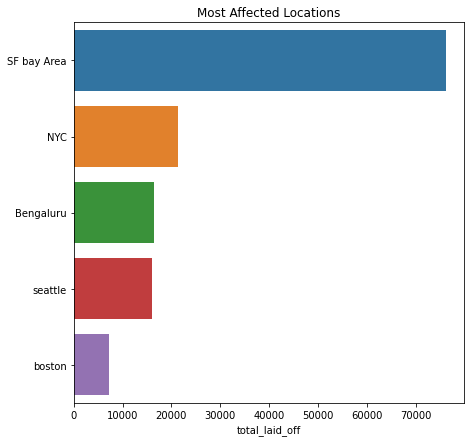

In [14]:
plt.figure(figsize=(7,7))
ax = sns.barplot(x=location, y=arr2, data=df)
plt.title('Most Affected Locations')
plt.show() 

#### San Francisco bay Area have been Most affected by the layoffs

In [15]:
#Lets split the date column to get more Insights :

df_1 = df.copy()

df_1['year']=df_1['date'].str.split('-').str[0]
df_1['month']=df_1['date'].str.split('-').str[1]
df_1['day']=df_1['date'].str.split('-').str[2]

df_1['year']=df_1['year'].astype(int)
df_1['month']=df_1['month'].astype(int)
df_1['day']=df_1['day'].astype(int)

In [16]:
df_1.head(2)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year,month,day
0,SIRCLO,Jakarta,Retail,160.0,0.08,2022-11-22,Series B,Indonesia,92.0,2022,11,22
1,Trax,Singapore,Retail,80.0,0.08,2022-11-22,Series E,Singapore,1000.0,2022,11,22


In [17]:
df_1['year'].nunique()

3

## 5 - Comparison of Layoffs to Previous Years :

In [18]:
df_1['year'].value_counts(sort=True)

2022    983
2020    633
2021     43
Name: year, dtype: int64

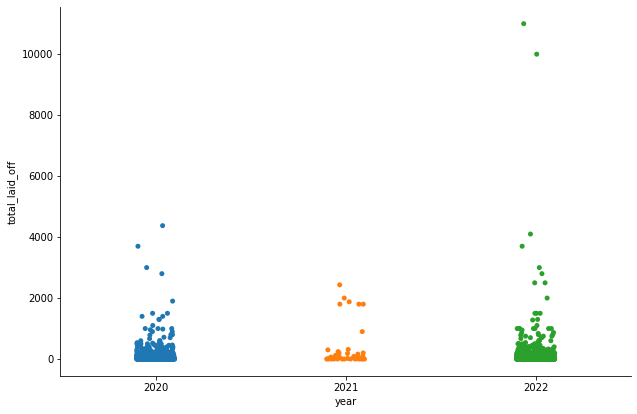

In [19]:
g = sns.catplot(x='year', y='total_laid_off', data=df_1)
g.fig.set_figwidth(10)
g.fig.set_figheight(6) 

## 6 - Total no of Layoffs - Year wise calculation :

In [20]:
df_layoffs_2022 = df_1[df_1['year']==2022]
df_layoffs_2021 = df_1[df_1['year']==2021]
df_layoffs_2020 = df_1[df_1['year']==2020]

total_laid_off_2020 = df_layoffs_2020['total_laid_off'].sum()
total_laid_off_2021 = df_layoffs_2021['total_laid_off'].sum()
total_laid_off_2022 = df_layoffs_2022['total_laid_off'].sum()

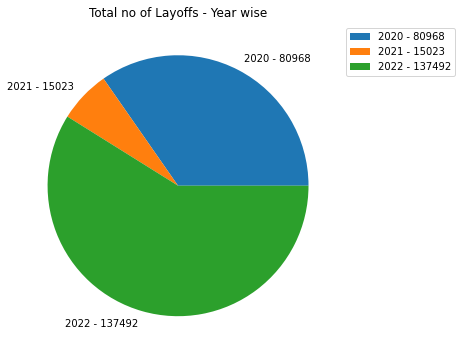

In [21]:
total_layoffs = (total_laid_off_2020,total_laid_off_2021,total_laid_off_2022)
labels = ['2020 - 80968','2021 - 15023','2022 - 137492']

plt.figure(figsize=(8,6))
plt.pie(total_layoffs, labels=labels,shadow=False)
plt.legend(labels=labels, 
           bbox_to_anchor=(1,1))
plt.title('Total no of Layoffs - Year wise')
plt.show()

## 7 - Sectorwise layoffs compared to previous Years :

<AxesSubplot:title={'center':'Sectorwise Layoffs in 2022,2021 & 2020'}, xlabel='industry', ylabel='total_laid_off'>

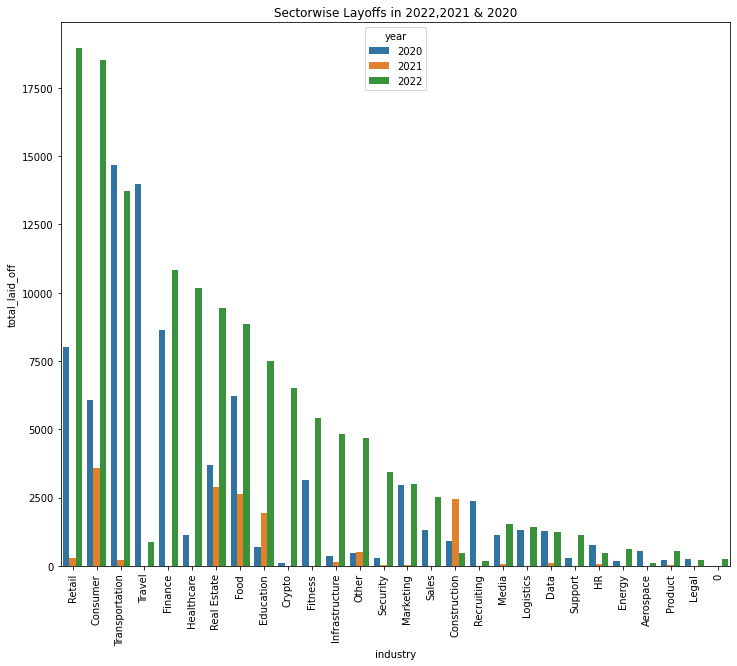

In [22]:
df_sector = df_1.groupby([ df_1.industry, df_1.year]).sum()
df_sector = df_sector.reset_index()

plt.figure(figsize=(12, 10))
plt.xticks(rotation=90)
plt.title("Sectorwise Layoffs in 2022,2021 & 2020")

sns.barplot(data=df_sector.sort_values(by=['total_laid_off','year'], ascending=False), x="industry", y="total_laid_off", hue="year")

#### Conclusion:
 
Year 2022 have the most no of layoffs , followed by 2020(COVID)

## Layoffs in India :

Lets see how the economic slowdown and Layoffs have affected USA and India 

In [23]:
df_india = df_1[df_1['country']=="India"]

## 8 - Most Affected Sector in India :

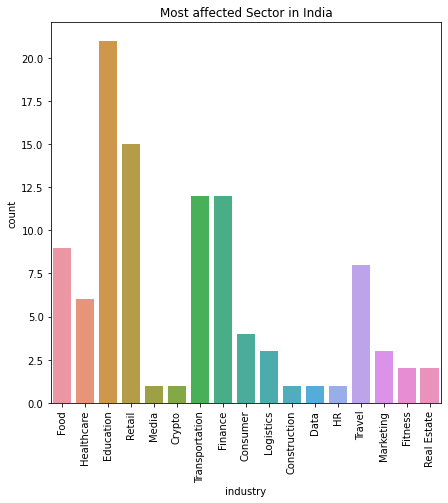

In [24]:
plt.figure(figsize=(7,7))
sns.countplot(x=df_india['industry'], data=df_india)
plt.title('Most affected Sector in India')
plt.xticks(rotation=90)
plt.show()

#### conclusion :
    
EdTech sector is heavinly affected and laid off comparing others

## 9 - Most Affected Locations in India :

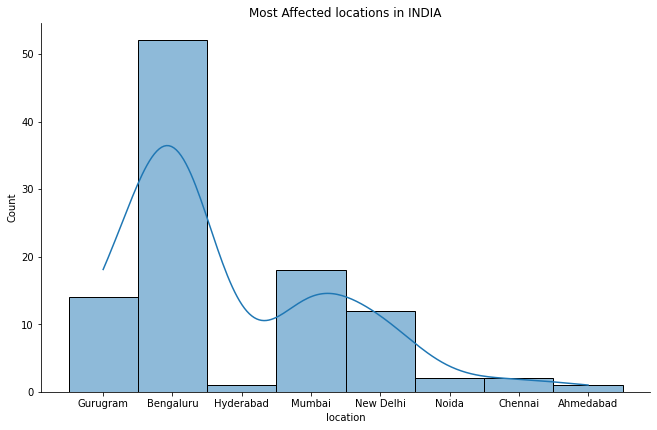

In [25]:
loc = sns.displot(x=df_india['location'], data=df_india, kde=True)
plt.title('Most Affected locations in INDIA')
loc.fig.set_figwidth(10)
loc.fig.set_figheight(6)

## 10 - No of Layoffs in Each Country:

In [26]:
df['country'].value_counts().reset_index().set_index('index')

,country
index,
United States,1109
India,102
Canada,75
Brazil,53
United Kingdom,48
Germany,46
Israel,36
Australia,31
Singapore,22


### Thank you for taking the time to read this notebook; please upvote and provide feedback.